In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import warnings




In [18]:
# https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
warnings.filterwarnings("ignore")

In [19]:
#Import our 3 datasets before merging them
#Merging those datasets will increase the number of rows and our dataset complexity.
#Datasets can be found here: https://www.kaggle.com/datasets/shivamb/netflix-shows
#https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows
#https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows


amazon_df = pd.read_csv('amazon_prime_titles.csv')
disney_df = pd.read_csv('disney_plus_titles.csv')
netflix_df = pd.read_csv('netflix_titles.csv')

In [20]:
# Display the first few rows of each dataset to understand their structure
amazon_df.head(), disney_df.head(), netflix_df.head()

#Add the platform column for exploratory analysis later on

netflix_df['Platform'] = 'Netflix'
amazon_df['Platform'] = 'Amazon Prime'
disney_df['Platform'] = 'Disney +'

In [21]:
#Merge the datasets together to get our movies dataset

df = pd.concat([netflix_df, amazon_df,disney_df])
df.isnull().sum()

#We will remove the movies with no duration so far, and we might drop further rows later on if we face issues with our analysis.
df = df.dropna(subset=['duration'])

#Some movies might be available on same platforms, but also some movies can old the same name (remakes, etc), so we will drop duplicates based both on title and duration.
df = df.drop_duplicates(subset=['title', 'duration'])

In [22]:
#Add the TMDB reviews to our movie dataset for our exploratory analysis, understand people's tastes in terms of movies
# Dataset can be found here: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_credits.csv
tmdb_movies_df = pd.read_csv('tmdb_5000_movies.csv')
tmdb_credits_df = pd.read_csv('tmdb_5000_credits.csv')

tmdb_movies_df.head(), tmdb_credits_df.head()

#The movie_id column from imdb_credits corresponds to the id column of idmb_movies
#Merge them based on this criterion
tmdb_credits_df.rename(columns={'movie_id': 'id'}, inplace=True)
df_tmdb = tmdb_movies_df.merge(tmdb_credits_df, on='id')


In [23]:
#Several research brought me on this: https://docs.python.org/3/library/collections.html
from collections import Counter

#Splitting the genres and count each from the column "listed_in"
counts = Counter()
for genres in df['listed_in'].dropna(): #Drop the rows with no "listed"
    genre_list = genres.split(', ') #Remove the comma from our column to count the occurences
    counts.update(genre_list) #Update our list using the Counter()

print(counts)
#This prints out the result but we see that we have "Drama" and "Dramas" treated separately because the dataset from Netflix
#uses "Dramas" and the one on Amazon/Disney uses "Drama". The same problem occurs for "comedy" and "comedies".

Counter({'Drama': 3751, 'International Movies': 2752, 'Comedy': 2562, 'Dramas': 2427, 'Comedies': 1674, 'Action': 1626, 'Suspense': 1467, 'International TV Shows': 1351, 'Kids': 1202, 'Documentary': 1158, 'Animation': 1078, 'Special Interest': 960, 'Documentaries': 869, 'Action & Adventure': 859, 'Horror': 859, 'TV Dramas': 763, 'Independent Movies': 756, 'Romance': 682, 'Children & Family Movies': 641, 'Family': 629, 'Romantic Movies': 616, 'TV Comedies': 581, 'Thrillers': 577, 'Science Fiction': 538, 'Docuseries': 516, 'Crime TV Shows': 470, 'Arts': 464, 'Entertainment': 464, 'and Culture': 464, "Kids' TV": 451, 'Action-Adventure': 449, 'Music & Musicals': 375, 'Romantic TV Shows': 370, 'Horror Movies': 357, 'International': 348, 'Stand-Up Comedy': 343, 'TV Shows': 272, 'Fantasy': 256, 'Reality TV': 255, 'British TV Shows': 253, 'Adventure': 250, 'Sci-Fi & Fantasy': 243, 'Western': 238, 'Sports Movies': 219, 'Animals & Nature': 207, 'Coming of Age': 201, 'Sports': 197, 'Anime Series'

In [24]:
#Define the function to replace dramas with drama
# Function to replace "Dramas" with "Drama" in Netflix entries
def replace_dramas(genre, platform):
    if platform == "Netflix" and "Dramas" in genre:
        return genre.replace("Dramas", "Drama") #Replace the name if the platform is netflix and has the word "Dramas" in the row
    else:
        return genre #Otherwise leave it as is
    
# Compute the function on the column
df['listed_in'] = df.apply(lambda row: replace_dramas(row['listed_in'], row['Platform']), axis=1) #replace the values on the column "listed in" row by row

In [25]:
dramas_check = df['listed_in'].str.contains("Dramas").any() #Checks whether the column "listed in" contains the word "dramas" anywhere
dramas_check

False

In [26]:
#Now do the same thing for Comedy and comedies
def replace_comedies(genre, platform):
    if platform == "Netflix" and "Comedies" in genre:
        return genre.replace("Comedies", "Comedy") #Replace the name if the platform is netflix and has the word "Comedies" in the row
    else:
        return genre #Otherwise leave it as is
    
# Compute the function on the column
df['listed_in'] = df.apply(lambda row: replace_comedies(row['listed_in'], row['Platform']), axis=1) #replace the values on the column "listed in" row by row


In [27]:
comedies_check = df['listed_in'].str.contains("Comedies").any() #Checks whether the column "listed in" contains the word "dramas" anywhere
comedies_check

False

In [28]:
#Now let's count the genres again and plot the top ones
for genres in df['listed_in'].dropna(): #Drop the rows with no "listed"
    genre_list = genres.split(', ') #Remove the comma from our column to count the occurences
    counts.update(genre_list) #Update our list using the Counter()

print(counts)

Counter({'Drama': 9929, 'Comedy': 6798, 'International Movies': 5504, 'Action': 3252, 'Suspense': 2934, 'International TV Shows': 2702, 'Dramas': 2427, 'Kids': 2404, 'Documentary': 2316, 'Animation': 2156, 'Special Interest': 1920, 'Documentaries': 1738, 'Action & Adventure': 1718, 'Horror': 1718, 'Comedies': 1674, 'Independent Movies': 1512, 'Romance': 1364, 'Children & Family Movies': 1282, 'Family': 1258, 'Romantic Movies': 1232, 'Thrillers': 1154, 'Science Fiction': 1076, 'Docuseries': 1032, 'Crime TV Shows': 940, 'Arts': 928, 'Entertainment': 928, 'and Culture': 928, "Kids' TV": 902, 'Action-Adventure': 898, 'TV Dramas': 763, 'TV Drama': 763, 'Music & Musicals': 750, 'Romantic TV Shows': 740, 'Horror Movies': 714, 'International': 696, 'Stand-Up Comedy': 686, 'TV Comedies': 581, 'TV Comedy': 581, 'TV Shows': 544, 'Fantasy': 512, 'Reality TV': 510, 'British TV Shows': 506, 'Adventure': 500, 'Sci-Fi & Fantasy': 486, 'Western': 476, 'Sports Movies': 438, 'Animals & Nature': 414, 'Com

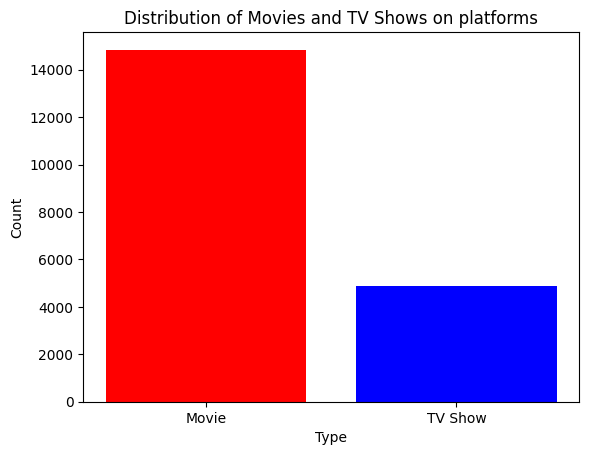

In [29]:
color = {'blue', 'red'}
platform_type = df['type'].value_counts()
plt.bar(platform_type.index, platform_type.values, color=color)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Movies and TV Shows on platforms')
plt.show()
#Movie      14846
#TV Show     4887

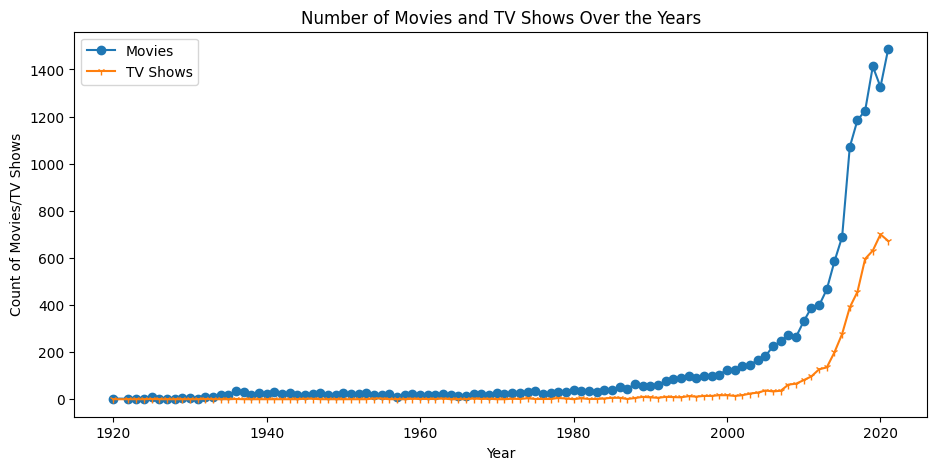

In [30]:
#Extract the two columns in a separate dataframe (does not work otherwise)
df_year_count = df[['release_year', 'type']]

#Count the movies and TV shows uploaded year by year
year_count = df_year_count.groupby(['release_year', 'type']).size().unstack(fill_value=0) #Unstack helps to separate the type from the year
plt.figure(figsize=(11,5))
plt.plot(year_count.index, year_count['Movie'], label='Movies', marker='o')
plt.plot(year_count.index, year_count['TV Show'], label='TV Shows', marker='1')
plt.xlabel('Year')
plt.ylabel('Count of Movies/TV Shows')
plt.title('Number of Movies and TV Shows Over the Years')
plt.legend()
plt.show()

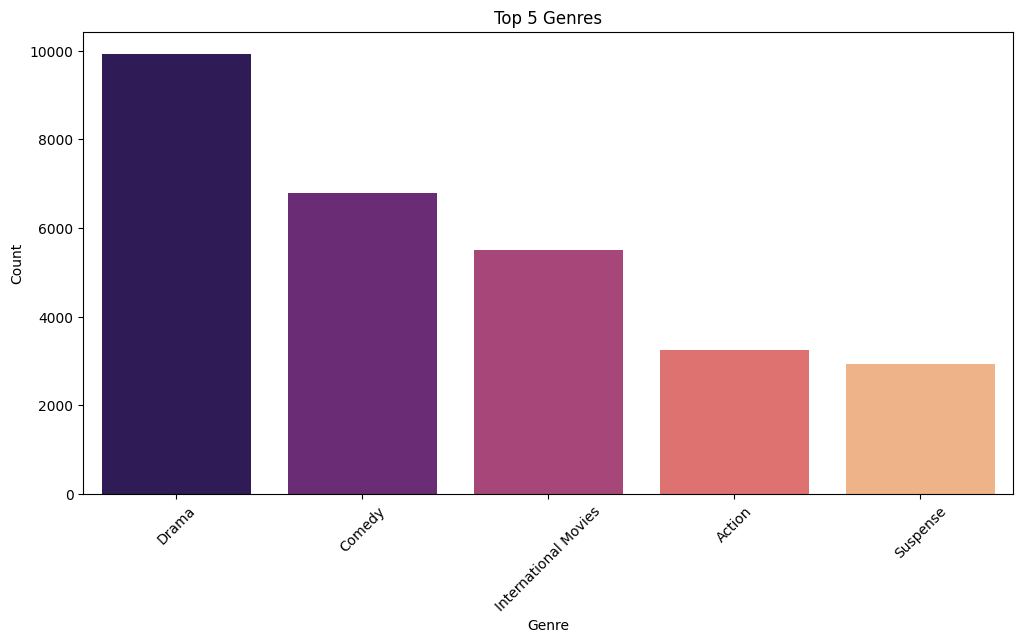

In [31]:
#Convert our counter to a dataframe so that we can display it 
genre_df = pd.DataFrame(counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending = False)
top5 = genre_df.head(5)
#Display it with matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x=top5['Genre'], y=top5['Count'], palette="magma")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 Genres')
plt.xticks(rotation=45)
plt.show()
#Drama is the most popular genre across those platforms, including both movies and tv shows.

In [32]:
#Data Cleaning of the imdb dataset that will be used for prediction and recommendation
#Define the function used to deserialise some of our variables

def extract_genres(json_genres):
    try:
        # Replace the punctuation to make it suitable for json
        imdb_genre = json.loads(json_genres.replace("'", "\""))
        # Genre the genre names from the variable and separate them with a comma
        return ', '.join([genre['name'] for genre in imdb_genre])
    except Exception as e:
        # Returning None if this does not work
        return None
    
#Apply it to our column
df_tmdb['genres']= df_tmdb['genres'].apply(extract_genres)

#Now let's do it for the other columns to make our dataset clean
df_tmdb['keywords']= df_tmdb['keywords'].apply(extract_genres)
df_tmdb['spoken_languages']= df_tmdb['spoken_languages'].apply(extract_genres)
df_tmdb['production_companies']= df_tmdb['production_companies'].apply(extract_genres)
df_tmdb['production_countries']= df_tmdb['production_countries'].apply(extract_genres)

In [33]:
#We will import data from another dataset to get the number of reviews from IMDB (much bigger sample) instead of TMDB
#Data set can be found here https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset/data
df_ratings = pd.read_csv('imdb_movie_metadata.csv')

#After few tries and a lot of wasted research, we will remove special characters and upper cases of titles before merging because it does not work otherwise
def clean_title(title):
    # Removing non-breaking spaces and other extra spaces, then lowercasing
    return re.sub(r'\s+', ' ', title).strip().lower()


#Rename the column of our new dataset to match "df_tmdb"
df_ratings.rename(columns={'movie_title': 'original_title'}, inplace=True)

#Apply the function to our both datasets
df_tmdb['original_title'] = df_tmdb['original_title'].apply(clean_title)
df_ratings['original_title'] = df_ratings['original_title'].apply(clean_title)

#Keep only the interesting columns to add to our df_tmdb (our initial columns are interesting already)
df_ratings_filtered = df_ratings[['original_title', 'num_voted_users', 'imdb_score', 'content_rating']]

In [34]:
#Merge and get our final dataset
df_imdb = pd.merge(df_tmdb, df_ratings_filtered, on='original_title', how='left')

In [35]:
#Put a caps to every letter now
movie_string = df_imdb['original_title']

def capitalize_words(input_string):
    words = input_string.split()  # Split the string into words
    capitalized_words = [word.capitalize() for word in words]  # Capitalize each word
    return ' '.join(capitalized_words)  # Join the words back into a string

#Apply the function to our dataset
df_imdb['original_title'] = df_imdb['original_title'].apply(lambda x: capitalize_words(x))


In [36]:
#Drop "vote_count" and "vote_average", no more needed; drop "title_x" and "title_y" which are also redundant
df_imdb = df_imdb.drop(columns=["vote_count", "vote_average", "title_x", "title_y"])

In [37]:
#rename the new columns as the previous ones
df_imdb.rename(columns={'num_voted_users': 'vote_count'}, inplace=True)
df_imdb.rename(columns={'imdb_score': 'IMDB Rating'}, inplace=True)

In [38]:
#Now let's do the same thing for casting, keeping only the names of the actors (so removing the names of characters)
def actor(cast):
    try:
        cast_list = json.loads(cast)
        return ', '.join([member['name'] for member in cast_list])
    except Exception as e:
        return 'error'

df_imdb['cast'] = df_imdb['cast'].apply(actor)
#This seems to work correctly, 122 movies have no referenced cast and they must be niche movies, we will deal with that now
df_imdb['cast'].isnull().sum()

0

In [39]:
#Extract the director and omit the rest of the crew who participated (sorry)
def extract_director(crew):
    #use JSON
    crew_list = json.loads(crew)
    
    #Get the name of director in the list
    for member in crew_list:
        if member['job'] == 'Director': #If the job in the crew is "Director", applies the function
            return member['name']  #Return the name of the director
    return None

#Assign a new column "director" to the dataset, equal to the "crew" one with the function applied to it
df_imdb['Director'] = df_imdb['crew'].apply(extract_director)

#drop the crew column as it is no more needed
df_imdb = df_imdb.drop('crew', axis=1)

In [40]:
##We will explore the data related to ratings, and check the ratings per genre
df_imdb['vote_count'].describe()
#4564 values, first quartile is 1003 which means that 25% of the movies have less than 1003 votes


count    4.564000e+03
mean     8.758821e+04
std      1.413380e+05
min      5.000000e+00
25%      1.003225e+04
50%      3.789300e+04
75%      1.020840e+05
max      1.689764e+06
Name: vote_count, dtype: float64

In [41]:
less_than_100 = (df_imdb['vote_count'] < 100).sum()
less_than_20 = (df_imdb['vote_count'] < 20).sum()
less_than_100, less_than_20

#72 movies out of 4925 have less than 100 votes. 11 movies have less than 20 votes, which could lead to biased results.

(72, 11)

In [42]:
#https://www.reddit.com/r/statistics/comments/1niai5/imbd_weighted_average/ This  link and few other on internet show that the rating of a movie
# weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C
#Where R is the average for the movie, v is the number of votes, m is the minimum number of votes to be listed in the chart and C the overall mean

#First let's find C
C = df_imdb['IMDB Rating'].mean()
C  #Average rating is 6.39 out of 10

6.399035933391762

In [43]:
#Then we need to define a value that will be the threshold to be eligible for the charts.
# https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system This notebook from Kaggle helped me understand the meaning of M here.
# We will claim that a movie need to get more votes than 50% of the other movies to be eligible, so that we remove the movies with no ratings
m = df_imdb['vote_count'].quantile(0.5)
eligible_movies = df_imdb[df_imdb['vote_count'] >= m]
eligible_movies.shape

(2282, 22)

In [44]:
eligible_movies['vote_count'].describe()
#Minimum number of votes is 37901, which is enough to be relevant

count    2.282000e+03
mean     1.623075e+05
std      1.693219e+05
min      3.790100e+04
25%      6.298225e+04
50%      1.020970e+05
75%      1.904772e+05
max      1.689764e+06
Name: vote_count, dtype: float64

In [45]:
#Now calculate the function for our top 961 in the charts
def weighted_rating(film, m=m, C=C):
    v = film['vote_count']
    R = film['IMDB Rating']
    # return the IMDB weighted rating formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [46]:
#Apply the function to our "eligible_movies" dataframe, on a new column "IMDB Rating"

eligible_movies["Weighted IMDB Rating"] = eligible_movies.apply(weighted_rating, axis=1)

#We will now compute some further EDA to understand the keys to a film's success

In [47]:
#Round the values to one decimal
eligible_movies['Weighted IMDB Rating'] = eligible_movies['Weighted IMDB Rating'].round(1)

In [48]:
# I just realised we have duplicate values, we will take care of it
eligible_movies = eligible_movies.drop_duplicates(subset='id', keep='first') #Keep the first occurence so that it does not delete all the rows

In [49]:
#Add the platform column to our eligible movies 
platformdata = df[['title', 'Platform']]
#Merge both dataframes on the title
eligible_movies = eligible_movies.rename(columns={'original_title': 'title'})
eligible_movies = pd.merge(eligible_movies, platformdata, on='title', how='left')
#Replace missing values with "Not available"


In [50]:
#Replace missing values with "Not available"
eligible_movies['Platform'] = eligible_movies['Platform'].fillna('Not available')

Text(0, 0.5, 'IMDB Rating')

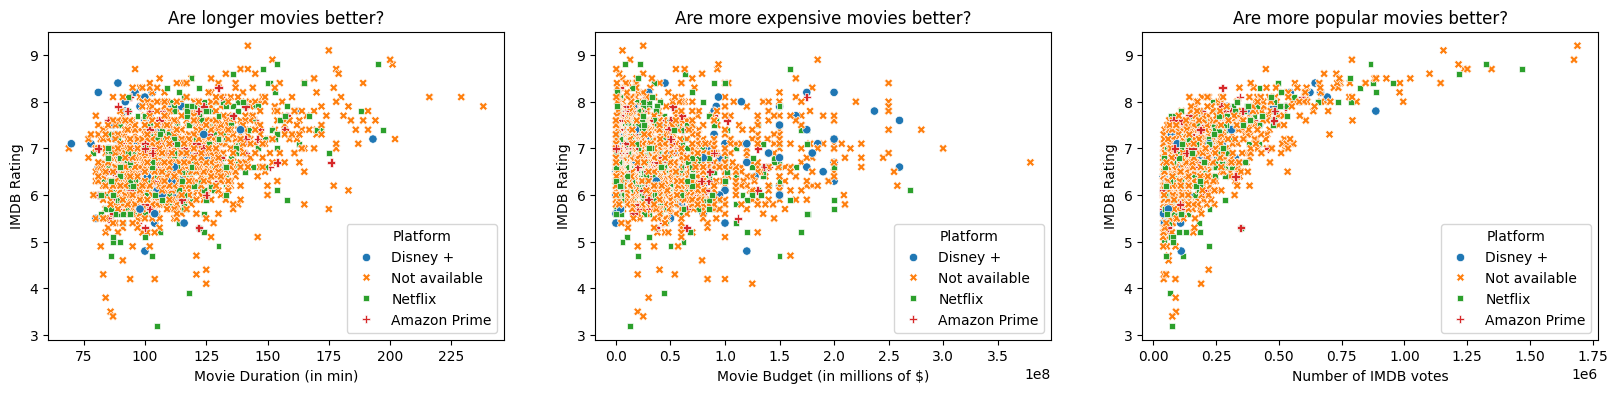

In [51]:
#Plot the rating with runtime, budget and popularity
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='runtime', y='Weighted IMDB Rating', data=eligible_movies, hue="Platform", style="Platform")
plt.title('Are longer movies better?')
plt.xlabel('Movie Duration (in min)')
plt.ylabel('IMDB Rating')

# Rating and Budget
plt.subplot(1, 3, 2)
sns.scatterplot(x='budget', y='Weighted IMDB Rating', data=eligible_movies, hue="Platform", style="Platform")
plt.title('Are more expensive movies better?')
plt.xlabel('Movie Budget (in millions of $)')
plt.ylabel('IMDB Rating')

# Rating and popularity
plt.subplot(1, 3, 3)
sns.scatterplot(x='vote_count', y='Weighted IMDB Rating', data=eligible_movies, hue="Platform", style="Platform")
plt.title('Are more popular movies better?')
plt.xlabel('Number of IMDB votes')
plt.ylabel('IMDB Rating')


#Number of votes and rating plot is really biased, because movies usually get popular because they are good and not the other way around

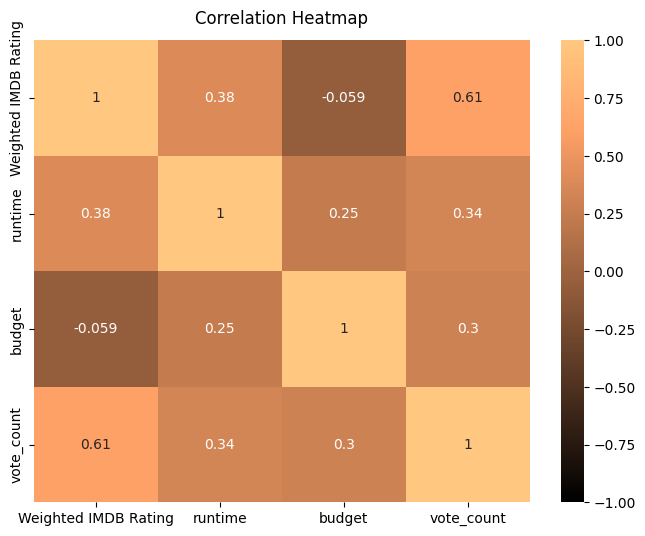

In [52]:
#We will compute some correlations and plots from several variables with ratings
corr_data = eligible_movies[['Weighted IMDB Rating', 'runtime', 'budget', 'vote_count']]

#Compute correlation heatmap
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e This has been used to get 
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(corr_data.corr(), vmin=-1, vmax=1, annot=True, cmap='copper')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

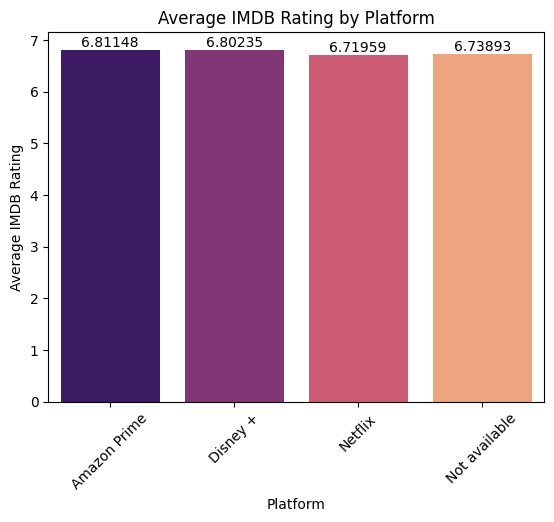

In [53]:
rating_by_platform = eligible_movies.groupby('Platform')['Weighted IMDB Rating'].mean()
rating_by_platform
# Plot it for better results
# https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/

ax = sns.barplot(x=rating_by_platform.index, y=rating_by_platform.values, palette='magma')

# Adding the value on top of each bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Average IMDB Rating by Platform')
plt.xlabel('Platform')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()


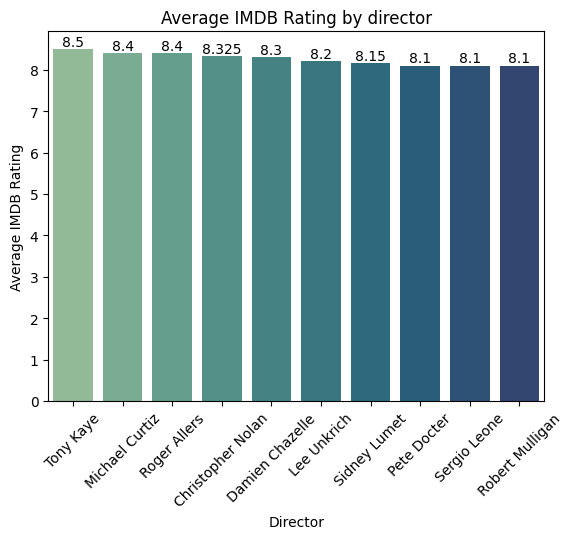

In [54]:
rating_by_director = eligible_movies.groupby('Director')['Weighted IMDB Rating'].mean().sort_values(ascending=False)

#Select the 10 best directors as there are too many
top_10_directors = rating_by_director.head(10)

#Plot it the same way
ax2 = sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='crest')

# Adding the value on top of each bar
for i in ax2.containers:
    ax2.bar_label(i,)

plt.title('Average IMDB Rating by director')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()

#Results might be biased because of the 

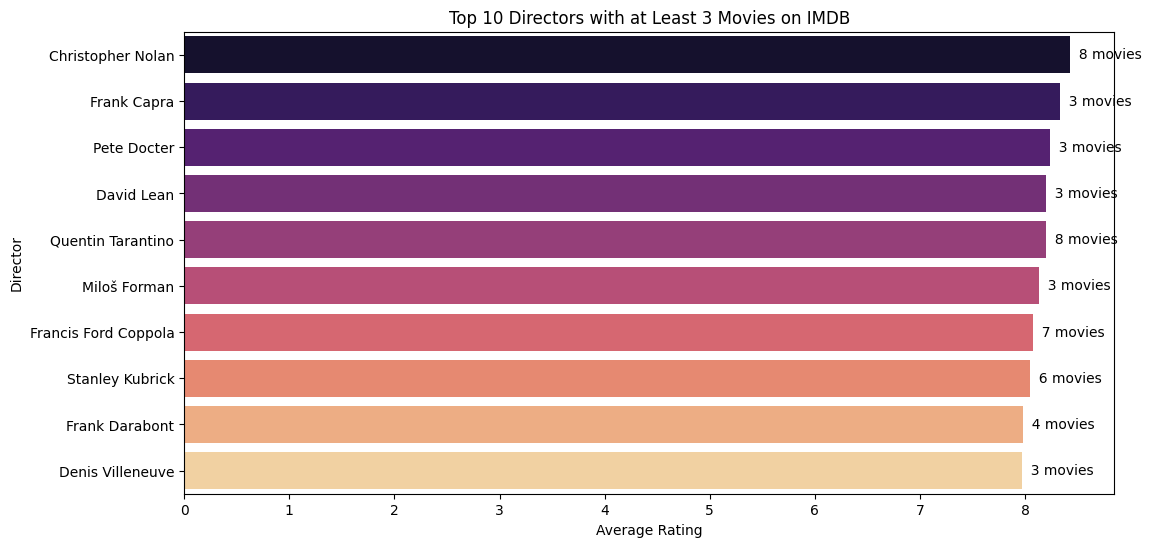

In [55]:
#We will show the top 10 for the directors who have at least 3 movies in this list
director_count = eligible_movies.groupby('Director')['title'].count() #store the number of movies by directer in the list "count"
director_count = director_count[director_count >=3]
director_count.count()
#Get the average imdb rating for each movie from every director in our filtered list
rating_by_director_filtered = eligible_movies[eligible_movies['Director'].isin(director_count.index)].groupby('Director')['IMDB Rating'].mean()
#Sort the values and get the first 10
top_10_directors_filtered = rating_by_director_filtered.sort_values(ascending=False).head(10)
#Get the movie count from each director from the index, to display it on the bar plot
movie_count = director_count.loc[top_10_directors_filtered.index]
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_10_directors_filtered.values, y=top_10_directors_filtered.index, palette="magma")
plt.title('Top 10 Directors with at Least 3 Movies on IMDB')
plt.xlabel('Average Rating')
plt.ylabel('Director')

#Assistance has been used for this
for index, value in enumerate(top_10_directors_filtered):
    plt.text(value, index, f'  {movie_count[top_10_directors_filtered.index[index]]} movies', va='center')

plt.show()

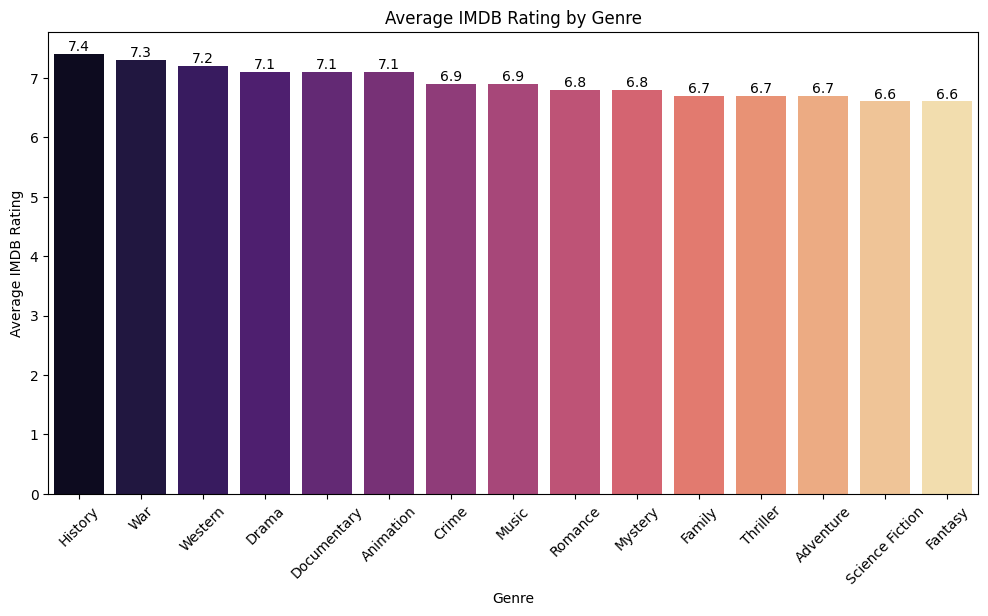

In [56]:
#There is no platform better than another, and we show that some directors tend to produce better movies than others
#What about the genres?
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html This is used to separate the genres because movies can belong to several categories
eligible_movies['genres_list'] = eligible_movies['genres'].str.split(', ') #Split all the genres based on the comma separating them
split_genres = eligible_movies.explode('genres_list')

#Get the average rating by genre for the top 15, from 1 to 15
average_rating_by_genre_top_15 = split_genres.groupby('genres_list')['IMDB Rating'].mean().sort_values(ascending=False).head(15).round(1)

#Plotting
plt.figure(figsize=(12, 6))

#define the plot
ax3 = sns.barplot(x=average_rating_by_genre_top_15.index, y=average_rating_by_genre_top_15.values, palette='magma')
#Add the value on top of each bar
for i in ax3.containers:
    ax3.bar_label(i,)

#Plot it
plt.title('Average IMDB Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)
plt.show()
#It is clear that some genres are more successful than others, we will focus on this 

Text(0.5, 1.0, 'Number of movies released and Average Rating year by year')

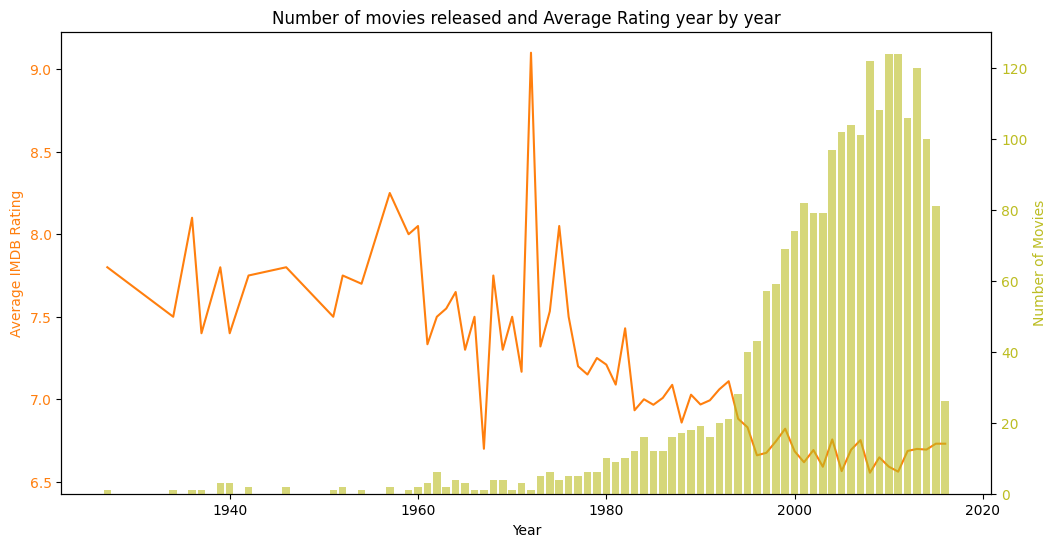

In [57]:
#Last piece of EDA, we will show the average rating by year, alongside the number of movies released every year
#First we need to convert our "release_date" column to year using pandas datetime
#No missing values so no need to use if and else in case of missing values
eligible_movies['year'] = pd.to_datetime(eligible_movies['release_date']).dt.year

#group the ratings by year, and movies by year
ratings_by_year = eligible_movies.groupby('year')['Weighted IMDB Rating'].mean()
movies_by_year = eligible_movies.groupby('year').size().sort_index()

#Defining the figure size now
fig, ax4 = plt.subplots(figsize=(12, 6))

#This is the line plot showing the ratings
color = 'tab:orange'
ax4.set_xlabel('Year') #This is set once only
ax4.set_ylabel('Average IMDB Rating', color=color)
ax4.plot(ratings_by_year.index, ratings_by_year, color=color)
ax4.tick_params(axis='y', labelcolor=color)

#Plot the histogram going over it 
ax5 = ax4.twinx()  #Dual plot
color2 = 'tab:olive'
ax5.set_ylabel('Number of Movies', color=color2) 
ax5.bar(movies_by_year.index, movies_by_year, color=color2, alpha=0.6)
ax5.tick_params(axis='y', labelcolor=color2)

plt.title('Number of movies released and Average Rating year by year')

In [58]:
#Linear regression on "Weighted IMDB ratings" to get some insights about what could influence the rating
# https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables
from sklearn.model_selection import train_test_split #Split for prediction
from sklearn.linear_model import LinearRegression #Linear regression
from sklearn.metrics import mean_squared_error, r2_score #Model evaluation
from sklearn.preprocessing import OneHotEncoder #Transforms the string columns into dummy variables
from sklearn.compose import ColumnTransformer #Transform our genres column that contains lists
import numpy as np

#Explose every genre and get the dummy variable out of every genre
genres_dummies = eligible_movies['genres_list'].explode().str.get_dummies().groupby(level=0).sum()

#Use this to put our predictors together under the name of X
X = pd.concat([eligible_movies['budget'], genres_dummies, eligible_movies['runtime']], axis=1)

#Store the values of the target variable
Y = eligible_movies['Weighted IMDB Rating'].values

#Split our dataset with 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

#Predict on test set
Y_pred = model.predict(X_test)

#comparing prediction with actual results to evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

#Store the coefficients as a series to make them readable
coef =pd.Series(model.coef_, index=X.columns)

mse, r2, coef

#R² of 0.22, MSE of 0.36 and coefficients genre by genre.
#Coefficients like action and comedy make a movie worse off in terms of ratings while a animated movie and a movie about crime seems to have a positive effect.

(0.362329230061523,
 0.23383572376660833,
 budget            -2.647867e-09
 Action            -1.189530e-01
 Adventure         -2.080366e-03
 Animation          7.030116e-01
 Comedy            -1.543211e-01
 Crime              1.156128e-01
 Documentary        6.612249e-02
 Drama              1.759415e-01
 Family            -3.965308e-02
 Fantasy           -5.764590e-02
 History           -1.354615e-01
 Horror            -1.676946e-01
 Music             -1.479238e-01
 Mystery           -2.959663e-02
 Romance           -1.171391e-01
 Science Fiction    7.601455e-02
 TV Movie           0.000000e+00
 Thriller          -1.165187e-01
 War               -6.560829e-03
 Western            1.202814e-01
 runtime            1.452786e-02
 dtype: float64)

In [59]:
##Movie recommendation engine based on genres, ratings, Director, Keywords and Movie title (which is to be assumed are the main criteria of people when looking for a new movie)
# Used https://www.youtube.com/watch?v=eyEabQRBMQA&t=187s&ab_channel=Dataquest
# Used https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system#Content-Based-Filtering
# Used https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75
from sklearn.feature_extraction.text import TfidfVectorizer #for frequency
from sklearn.metrics.pairwise import cosine_similarity #For similarity within the movies

#Extract the features we are interested in
recommendation_features = ['genres', 'title', 'keywords', 'Director', 'Weighted IMDB Rating']

#Check for missing values
# Handling missing values
for feature in recommendation_features:
    eligible_movies[feature] = eligible_movies[feature].fillna('')


#Combine our text features into a single string
def combine_features(row):
    return row['genres'] + " " + row['title'] + " " + row['keywords'] + " " + row['Director'] + " " + str(row['IMDB Rating'])

#Apply our function
eligible_movies["combined_features"] = eligible_movies.apply(combine_features, axis=1)

#Convert the text into the tfidf matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english') #Remove the useless english words 
tfidf_matrix = tfidf_vectorizer.fit_transform(eligible_movies['combined_features']) #Transform it using the vectorizer

#Compute the cosine similarity matrix (that will be used for movie similarity based on our features)
cosine = cosine_similarity(tfidf_matrix)

In [60]:
#Now define the function that returns the movie, if it's in our dataset 

def recommend_movies(title, cosine_sim=cosine, movies=eligible_movies, top_n=5):
    if title not in eligible_movies['title'].values:
        return f"Movie '{title}' not found in dataset." #Returns an error message when the movie is not in the dataset

    #Get the index of the movie which matches the title
    index_movie = eligible_movies.index[eligible_movies['title'] == title].tolist()[0]

    #Store all the similarity scores of a given movie to a list
    sim_scores = list(enumerate(cosine[index_movie]))

    #Sort all the similarity scores based on how similar they are (the value)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Get the scores of the top 5 (as defined in the initial function with top_n=5, adjusting top_n in the function can return more or less recommendations)
    sim_scores = sim_scores[1:top_n+1]

    #Get the index related to the similarity score, in order to display a movie title and not a number
    indices = [i[0] for i in sim_scores]

    #now return the function and get the 5 most similar movies
    return eligible_movies['title'].iloc[indices].tolist()

In [61]:
#Try the function with a movie from the dataset
avatar_rec = eligible_movies['title'].iloc[0]  #Take Avatar as a quick example (first movie in the list hence the iloc[0]), to state if this works or not


#Apply the function to a new variable and return the movies
recommendation = recommend_movies(avatar_rec)

recommendation

#The 5 recommendations are:
# ['Aliens', 'Soldier', 'Planet Of The Apes', 'Alien', 'Star Trek Into Darkness']
#Following my knowledge of cinema, this makes sense to be honest.

['Aliens', 'Soldier', 'Planet Of The Apes', 'Alien', 'Star Trek Into Darkness']

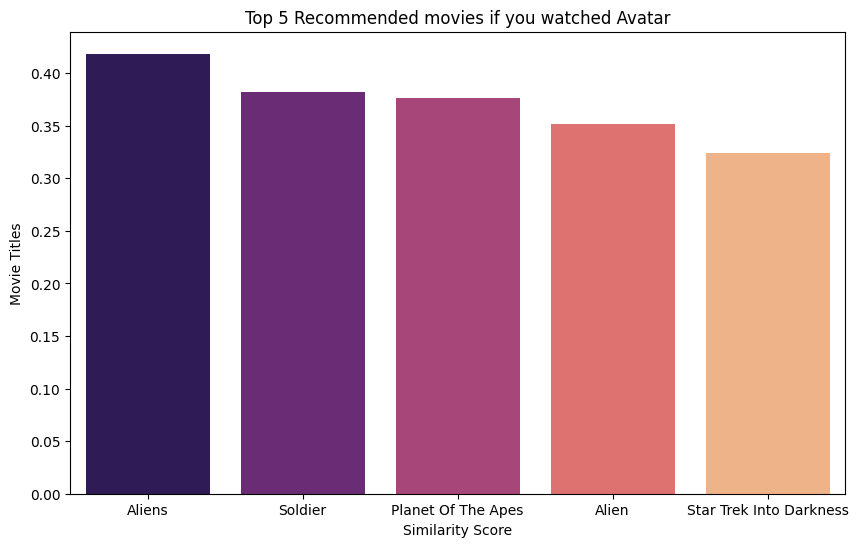

In [62]:
#Plot it with seaborn now, to display it in the assessment

#extract the index for Avatar
avatar_index = eligible_movies[eligible_movies['title'] == "Avatar"].index[0]

#Do the same process as the function, store the similarity scores and sort them
avatar_similarity = list(enumerate(cosine[avatar_index]))
avatar_similarity = sorted(avatar_similarity, key=lambda x: x[1], reverse=True) #Reverse=True displays the most similar movie at the beginning and not at the end

# Get the top 5 recommendations (excluding the first one which is the movie itself)
top_5_avatar = avatar_similarity[1:6]

# Extract movie titles and their corresponding similarity scores
avatar_titles = [eligible_movies['title'].iloc[i[0]] for i in top_5_avatar]
avatar_scores = [i[1] for i in top_5_avatar]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=avatar_titles, y=avatar_scores, palette="magma")
plt.title('Top 5 Recommended movies if you watched Avatar')
plt.xlabel('Similarity Score')
plt.ylabel('Movie Titles')
plt.show()
